YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - loss: 0.0283
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0024
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0019
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0018
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0016
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0015
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0015
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0016
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 0.0013
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0014
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0015
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0011
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0014
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0012
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0012
E

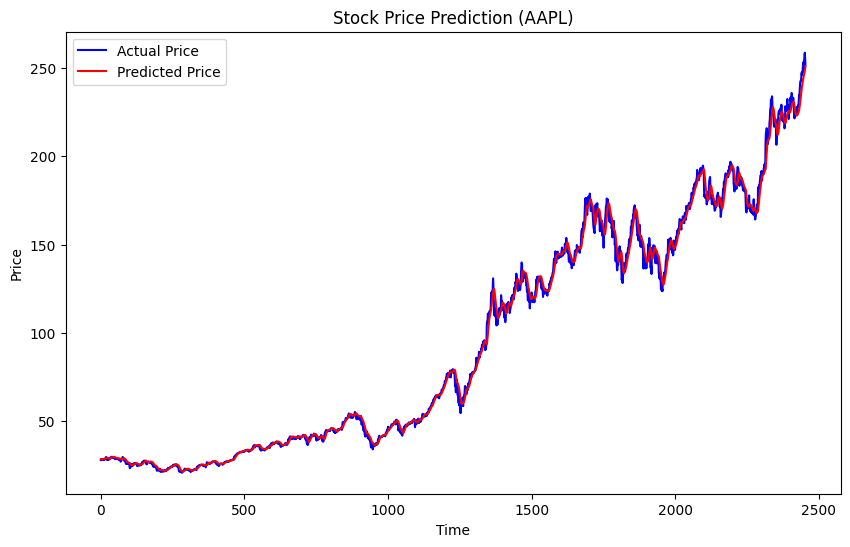

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import yfinance as yf

# Step 1: Load Stock Data
df = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
data = df[['Close']]

# Step 2: Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 3: Create Sequences
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Step 4: Reshape for LSTM [samples, time_steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 5: Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train Model
model.fit(X, y, epochs=20, batch_size=32)

# Step 7: Predict
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Step 8: Plot Results
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Price')
plt.plot(predicted_prices, color='red', label='Predicted Price')
plt.title('Stock Price Prediction (AAPL)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
